# 通过python SDK创建用户

步骤:
1. 

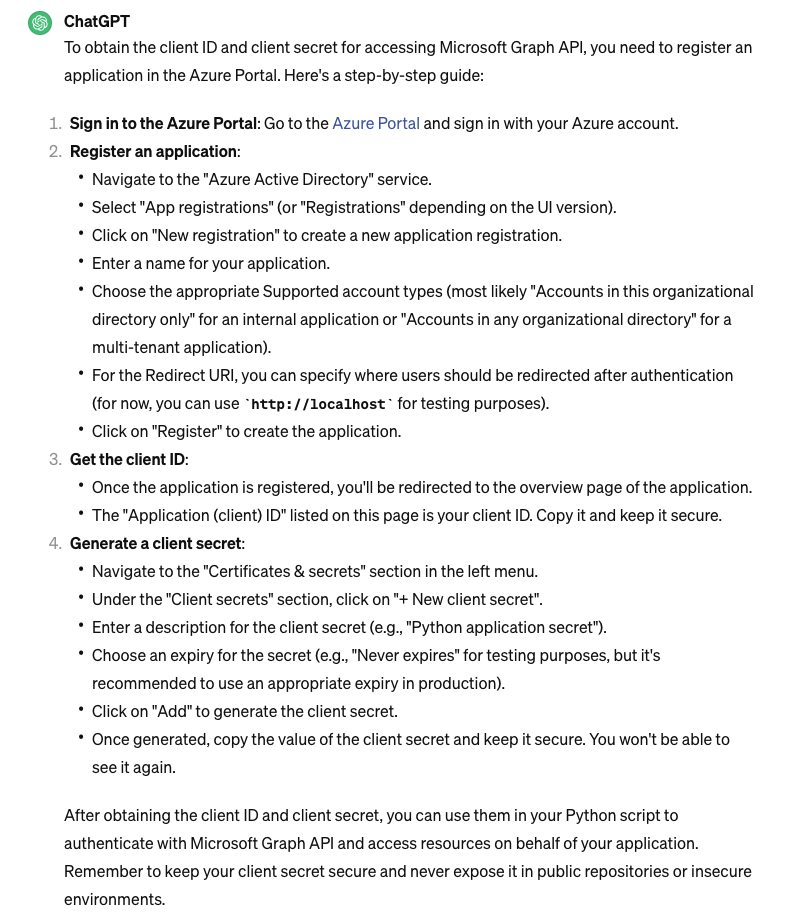

In [ ]:
from msgraph.client import GraphClient
from msgraph.client.models import User
from dotenv import load_dotenv
import os

# Load environment variables from .env file
dotenv_path = Path('./.env_dg')
load_dotenv(dotenv_path=dotenv_path)

# Load Azure AD app credentials and tenant ID from environment variables
CLIENT_ID = os.getenv('CLIENT_ID')
CLIENT_SECRET = os.getenv('CLIENT_SECRET')
TENANT_ID = os.getenv('TENANT_ID')

# Create an instance of GraphClient with your credentials
graph_client = GraphClient(CLIENT_ID, CLIENT_SECRET, TENANT_ID)

# Define user properties
user = User({
    "accountEnabled": True,
    "displayName": "John Doe",
    "mailNickname": "john.doe",
    "userPrincipalName": "john.doe@yourdomain.com",
    "passwordProfile": {
        "forceChangePasswordNextSignIn": False,
        "password": "your_password_here"
    }
})

# Create the user
created_user = graph_client.users.create(user)

# Print the created user's details
print("User created successfully:")
print("Display Name:", created_user.display_name)
print("User Principal Name:", created_user.user_principal_name)





In [ ]:


# Assign license to the user
license_assignment_body = {
    "addLicenses": [
        {
            "skuId": "your_sku_id_here"
        }
    ],
    "removeLicenses": []
}
graph_client.users[created_user.id].assign_license(license_assignment_body)

print("User created successfully and assigned license.")

# Define group ID
group_id = "your_group_id_here"

# Assign the group to the user
group = Group({
    "id": group_id
})
graph_client.users[created_user.id].groups[group_id].add(group)

print("User created successfully and assigned to the group.")

# Get the ID of the SharePoint folder
folder_id = "your_sharepoint_folder_id_here"  # You need to replace this with the actual ID

# Get the ID or email address of the new user
new_user_email = "newuser@example.com"  # You need to replace this with the actual email address

# Share the SharePoint folder with the new user
share_request = {
    "recipients": [
        {
            "email": new_user_email
        }
    ],
    "message": "Sharing the SharePoint folder with you.",
    "requireSignIn": True,
    "sendInvitation": True,
    "roles": ["write"]  # Choose the appropriate permission level
}
graph_client.sites[folder_id].drive.items["root"].invite(share_request)

print("Folder shared with the new user and invitation sent via email.")